# Text summarizer in Python, Tieng Viet


## Credit: code from https://github.com/louisteo9/personal-text-summarizer

In [1]:
# Natural Language Tool Kit (NLTK)
import nltk
nltk.download('stopwords')

# Regular Expression for text preprocessing
import re

# Heap (priority) queue algorithm to get the top sentences
import heapq

# NumPy for numerical computing
import numpy as np

# pandas for creating DataFrames
import pandas as pd

# matplotlib for plot
from matplotlib import pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/david/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load text data

In [4]:
# load text file
with open('viet_article1.txt', 'r') as f:
    file_data = f.read()

In [5]:
# view text data
print(file_data)

Thêm 9 người nhập cảnh nhiễm nCoV

Ngày 1/1, Bộ Y tế ghi nhận ca dương tính nCoV, đều là người nhập cảnh được cách ly ngay tại Khánh Hòa, Bình Dương và Long An. Tổng ca nhiễm lên 1.474.

"Bệnh nhân 1466", nam, 35 tuổi, ở TP Hưng Yên, tỉnh Hưng Yên. "Bệnh nhân 1467" nam, 38, tuổi, ở huyện Thanh Hà, tỉnh Hải Dương. "Bệnh nhân 1468", nam, 51 tuổi, ở huyện Thanh Chương, tỉnh Nghệ An. Ba người này từ Nga nhập cảnh sân bay Cam Ranh trên chuyến bay VN5062 ngày 25/12, cách ly tại tỉnh Khánh Hòa. Kết quả xét nghiệm lần một ngày 25/12 âm tính; lấy mẫu lần hai ngày 30/12 kết quả xét nghiệm tại Trung tâm Kiểm soát Bệnh tật tỉnh Khánh Hòa dương tính với nCoV, các bệnh nhân điều trị tại Bệnh viện Bệnh nhiệt đới tỉnh Khánh Hòa.

Trước đó trên chuyến bay này đã ghi nhận 9 trường hợp dương tính với nCoV.

"Bệnh nhân 1469", nam, 32 tuổi, ở quận Hải Châu, TP Đà Nẵng. "Bệnh nhân 1470", nữ, 40 tuổi, ở huyện Ba Vì, và "bệnh nhân 1471", nam, 37 tuổi, ở huyện Chương Mỹ, TP Hà Nội. "Bệnh nhân 1472", nam, 29 tu

In [7]:
text = file_data
text = re.sub(r'\[[0-9]*\]',' ',text) # replace reference number i.e. [1], [10], [20] with empty space, if any..
text = re.sub(r'\s+',' ',text) # replace one or more spaces with single space
print(text)

Thêm 9 người nhập cảnh nhiễm nCoV Ngày 1/1, Bộ Y tế ghi nhận ca dương tính nCoV, đều là người nhập cảnh được cách ly ngay tại Khánh Hòa, Bình Dương và Long An. Tổng ca nhiễm lên 1.474. "Bệnh nhân 1466", nam, 35 tuổi, ở TP Hưng Yên, tỉnh Hưng Yên. "Bệnh nhân 1467" nam, 38, tuổi, ở huyện Thanh Hà, tỉnh Hải Dương. "Bệnh nhân 1468", nam, 51 tuổi, ở huyện Thanh Chương, tỉnh Nghệ An. Ba người này từ Nga nhập cảnh sân bay Cam Ranh trên chuyến bay VN5062 ngày 25/12, cách ly tại tỉnh Khánh Hòa. Kết quả xét nghiệm lần một ngày 25/12 âm tính; lấy mẫu lần hai ngày 30/12 kết quả xét nghiệm tại Trung tâm Kiểm soát Bệnh tật tỉnh Khánh Hòa dương tính với nCoV, các bệnh nhân điều trị tại Bệnh viện Bệnh nhiệt đới tỉnh Khánh Hòa. Trước đó trên chuyến bay này đã ghi nhận 9 trường hợp dương tính với nCoV. "Bệnh nhân 1469", nam, 32 tuổi, ở quận Hải Châu, TP Đà Nẵng. "Bệnh nhân 1470", nữ, 40 tuổi, ở huyện Ba Vì, và "bệnh nhân 1471", nam, 37 tuổi, ở huyện Chương Mỹ, TP Hà Nội. "Bệnh nhân 1472", nam, 29 tuổi, 

In [8]:
# generate clean text
clean_text = text.lower() # convert all uppercase characters into lowercase characters

# replace characters other than [a-zA-Z0-9], digits & one or more spaces with single space
regex_patterns = [r'\W',r'\d',r'\s+']
for regex in regex_patterns:
    clean_text = re.sub(regex,' ',clean_text)

print(clean_text)

thêm người nhập cảnh nhiễm ncov ngày bộ y tế ghi nhận ca dương tính ncov đều là người nhập cảnh được cách ly ngay tại khánh hòa bình dương và long an tổng ca nhiễm lên bệnh nhân nam tuổi ở tp hưng yên tỉnh hưng yên bệnh nhân nam tuổi ở huyện thanh hà tỉnh hải dương bệnh nhân nam tuổi ở huyện thanh chương tỉnh nghệ an ba người này từ nga nhập cảnh sân bay cam ranh trên chuyến bay vn ngày cách ly tại tỉnh khánh hòa kết quả xét nghiệm lần một ngày âm tính lấy mẫu lần hai ngày kết quả xét nghiệm tại trung tâm kiểm soát bệnh tật tỉnh khánh hòa dương tính với ncov các bệnh nhân điều trị tại bệnh viện bệnh nhiệt đới tỉnh khánh hòa trước đó trên chuyến bay này đã ghi nhận trường hợp dương tính với ncov bệnh nhân nam tuổi ở quận hải châu tp đà nẵng bệnh nhân nữ tuổi ở huyện ba vì và bệnh nhân nam tuổi ở huyện chương mỹ tp hà nội bệnh nhân nam tuổi ở huyện kim thành và bệnh nhân nam tuổi ở huyện thanh hà tỉnh hải dương họ từ đức nhập cảnh sân bay tân sơn nhất trên chuyến bay vn ngày được cách ly

In [9]:
# split (tokenize) the sentences
sentences = nltk.sent_tokenize(text)
print(sentences)

['Thêm 9 người nhập cảnh nhiễm nCoV Ngày 1/1, Bộ Y tế ghi nhận ca dương tính nCoV, đều là người nhập cảnh được cách ly ngay tại Khánh Hòa, Bình Dương và Long An.', 'Tổng ca nhiễm lên 1.474.', '"Bệnh nhân 1466", nam, 35 tuổi, ở TP Hưng Yên, tỉnh Hưng Yên.', '"Bệnh nhân 1467" nam, 38, tuổi, ở huyện Thanh Hà, tỉnh Hải Dương.', '"Bệnh nhân 1468", nam, 51 tuổi, ở huyện Thanh Chương, tỉnh Nghệ An.', 'Ba người này từ Nga nhập cảnh sân bay Cam Ranh trên chuyến bay VN5062 ngày 25/12, cách ly tại tỉnh Khánh Hòa.', 'Kết quả xét nghiệm lần một ngày 25/12 âm tính; lấy mẫu lần hai ngày 30/12 kết quả xét nghiệm tại Trung tâm Kiểm soát Bệnh tật tỉnh Khánh Hòa dương tính với nCoV, các bệnh nhân điều trị tại Bệnh viện Bệnh nhiệt đới tỉnh Khánh Hòa.', 'Trước đó trên chuyến bay này đã ghi nhận 9 trường hợp dương tính với nCoV.', '"Bệnh nhân 1469", nam, 32 tuổi, ở quận Hải Châu, TP Đà Nẵng.', '"Bệnh nhân 1470", nữ, 40 tuổi, ở huyện Ba Vì, và "bệnh nhân 1471", nam, 37 tuổi, ở huyện Chương Mỹ, TP Hà Nội.', '

In [12]:
# # get stop words list
# stop_words = nltk.corpus.stopwords.words('Vietnamese')
# print(stop_words)

In [14]:
# create an empty dictionary to house the word count
word_count = {}

# loop through tokenized words, remove stop words and save word count to dictionary
for word in nltk.word_tokenize(clean_text):
        # save word count to dictionary
        if word not in word_count.keys():
            word_count[word] = 1
        else:
            word_count[word] += 1

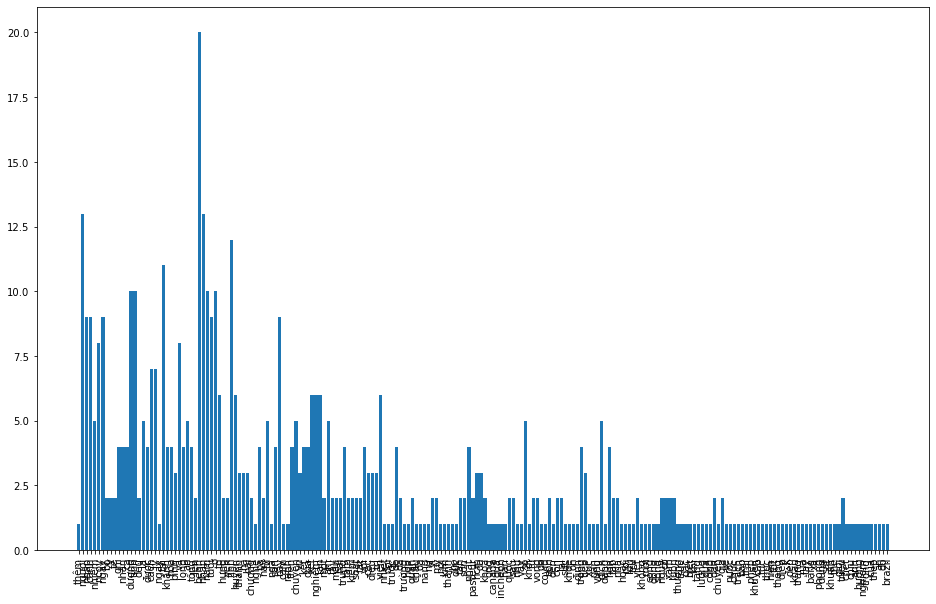

In [15]:
plt.figure(figsize=(16,10))
plt.xticks(rotation = 90)
plt.bar(word_count.keys(), word_count.values())
plt.show()

In [16]:
# helper function for plotting the top words.
def plot_top_words(word_count_dict, show_top_n=20):
    word_count_table = pd.DataFrame.from_dict(word_count_dict, orient = 'index').rename(columns={0: 'score'})
    word_count_table.sort_values(by='score').tail(show_top_n).plot(kind='barh', figsize=(10,10))
    plt.show()

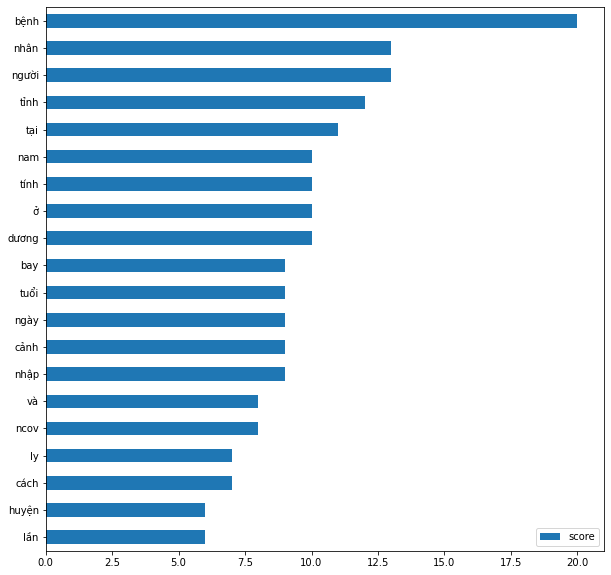

In [17]:
plot_top_words(word_count, 20)

In [18]:
# create empty dictionary to house sentence score    
sentence_score = {}

# loop through tokenized sentence, only take sentences that have less than 30 words, then add word score to form sentence score
for sentence in sentences:
    # check if word in sentence is in word_count dictionary
    for word in nltk.word_tokenize(sentence.lower()):
        if word in word_count.keys():
            # only take sentence that has less than 30 words
            if len(sentence.split(' ')) < 30:
                # add word score to sentence score
                if sentence not in sentence_score.keys():
                    sentence_score[sentence] = word_count[word]
                else:
                    sentence_score[sentence] += word_count[word]

In [19]:
df_sentence_score = pd.DataFrame.from_dict(sentence_score, orient = 'index').rename(columns={0: 'score'})
df_sentence_score.sort_values(by='score', ascending = False)

,score
"Kết quả xét nghiệm ngày 31/12 tại Viện Pasteur TP HCM dương tính với nCoV, các bệnh nhân điều trị tại Bệnh viện Đa khoa tỉnh Bình Dương.",198
"""Bệnh nhân 1472"", nam, 29 tuổi, ở huyện Kim Thành, và ""bệnh nhân 1473"", nam, 37 tuổi, ở huyện Thanh Hà, tỉnh Hải Dương.",177
"""Bệnh nhân 1470"", nữ, 40 tuổi, ở huyện Ba Vì, và ""bệnh nhân 1471"", nam, 37 tuổi, ở huyện Chương Mỹ, TP Hà Nội.",155
"Ba người này từ Nga nhập cảnh sân bay Cam Ranh trên chuyến bay VN5062 ngày 25/12, cách ly tại tỉnh Khánh Hòa.",130
Họ từ Đức nhập cảnh sân bay Tân Sơn Nhất trên chuyến bay VN30 ngày 30/12 được cách ly tại tỉnh Bình Dương.,127
"Trong đó, cách ly tập trung tại bệnh viện 150; cách ly tập trung hơn 15.000, còn lại ở nhà hoặc nơi lưu trú.",109
"""Bệnh nhân 1467"" nam, 38, tuổi, ở huyện Thanh Hà, tỉnh Hải Dương.",99
"""Bệnh nhân 1468"", nam, 51 tuổi, ở huyện Thanh Chương, tỉnh Nghệ An.",91
"Số người tử vong do Covid-19 là 35, bốn người tử vong sau ba đến bốn lần xét nghiệm âm tính.",89
"""Bệnh nhân 1466"", nam, 35 tuổi, ở TP Hưng Yên, tỉnh Hưng Yên.",88


In [20]:
# get the best 3 sentences for summary             
best_sentences = heapq.nlargest(3, sentence_score, key=sentence_score.get)

In [21]:
print('SUMMARY')
print('------------------------')

# display top sentences based on their sentence sequence in the original text
for sentence in sentences:
    if sentence in best_sentences:
        print (sentence)

SUMMARY
------------------------
"Bệnh nhân 1470", nữ, 40 tuổi, ở huyện Ba Vì, và "bệnh nhân 1471", nam, 37 tuổi, ở huyện Chương Mỹ, TP Hà Nội.
"Bệnh nhân 1472", nam, 29 tuổi, ở huyện Kim Thành, và "bệnh nhân 1473", nam, 37 tuổi, ở huyện Thanh Hà, tỉnh Hải Dương.
Kết quả xét nghiệm ngày 31/12 tại Viện Pasteur TP HCM dương tính với nCoV, các bệnh nhân điều trị tại Bệnh viện Đa khoa tỉnh Bình Dương.


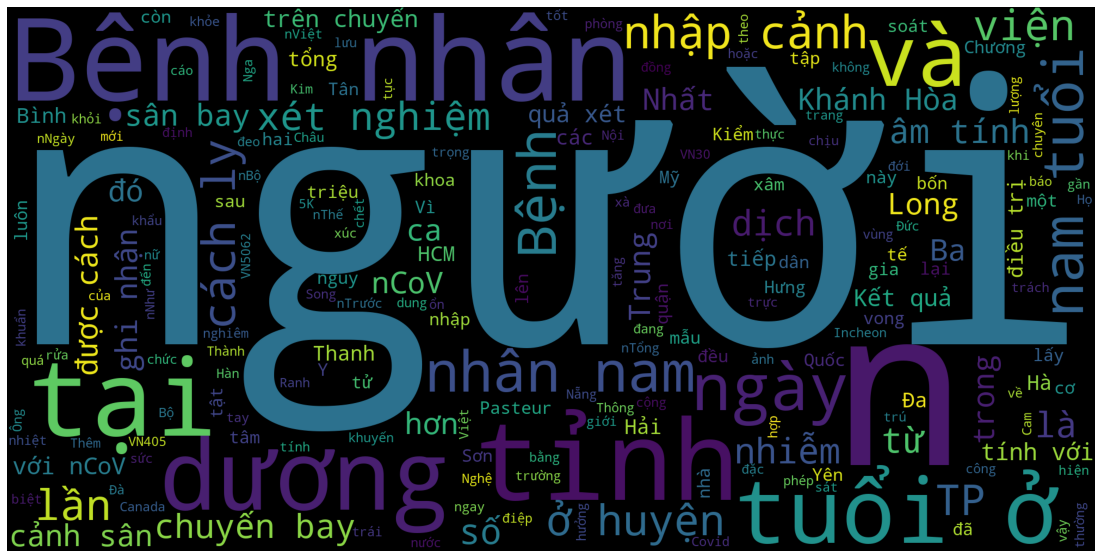

In [22]:
import wordcloud

# Wordcloud of training set
cloud = np.array(file_data).flatten()
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(
    max_words=200,background_color ="black",
    width=2000,height=1000,mode="RGB"
).generate(str(cloud))
plt.axis("off")
plt.imshow(word_cloud)

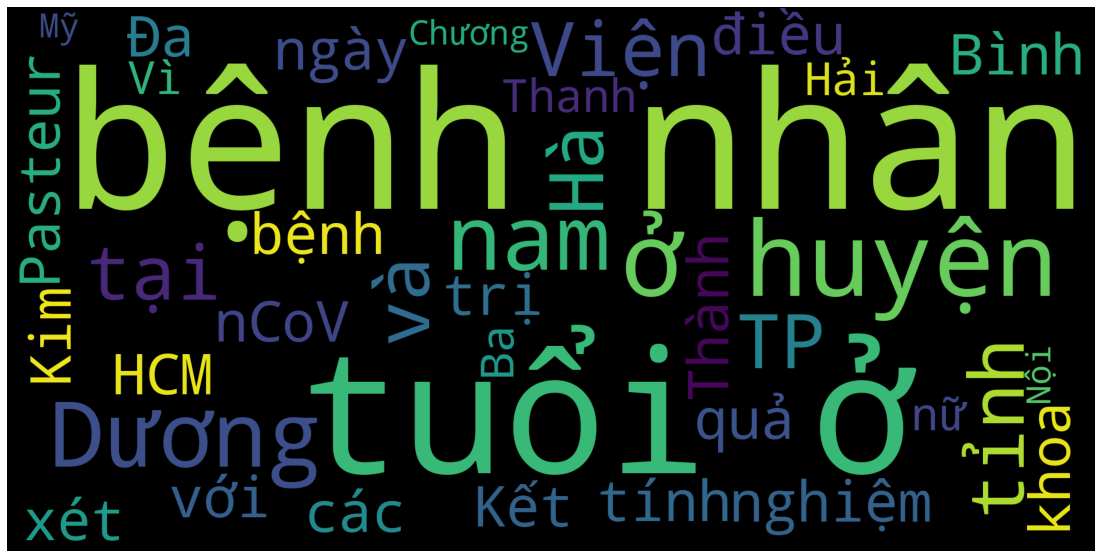

In [26]:
import wordcloud

# Wordcloud of training set
cloud = np.array(best_sentences).flatten()
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(
    max_words=200,background_color ="black",
    width=2000,height=1000,mode="RGB"
).generate(str(cloud))
plt.axis("off")
plt.imshow(word_cloud)